<center><font size="6"><b>ĐỒ ÁN CUỐI KỲ: MÔ HÌNH KHÍ HẬU</b></font></center>

| MSSV     | Họ và tên         |
|----------|-------------------|
| 19120539 | Vương Thế Khang   |
| 19120555 | Lê Kiệt           |
| 19120571 | Nguyễn Minh Lương |

# THƯ VIỆN

In [1]:
import types
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def prettify_temp_labels(ax):
    yticks = ax.get_yticks()
    ax.set_yticks(yticks)
    trunc_labels = [f'{round(yt,2)}°C' for yt in yticks]
    ax.set_yticklabels(trunc_labels)

# DỮ LIỆU

In [3]:
temp_df = pd.read_csv('Data/graph.csv', skiprows = 1, index_col = 0)
temp_df = temp_df + 14.15
temp_df

,No_Smoothing,Lowess(5)
Year,,
1880,13.98,14.06
1881,14.07,14.02
1882,14.04,13.98
1883,13.97,13.95
1884,13.86,13.91
...,...,...
2017,15.07,15.06
2018,14.99,15.07
2019,15.12,15.07


In [4]:
forcings_df = pd.read_csv('Data/forcings.csv', index_col = 0)
forcings_df = forcings_df - 273.5
forcings_df['Thermal'] = forcings_df['Solar'] - (1368 * (1 - 0.3) / 4 - 273)
forcings_df

,All forcings,Human,Natural,Anthropogenic tropospheric aerosol,Greenhouse gases,Land use,Orbital changes,Ozone,Solar,Volcanic,Thermal
Year,,,,,,,,,,,
1850,13.967659,13.928996,13.946649,13.925891,13.917000,13.950350,13.942937,13.950645,13.950350,13.946649,47.550350
1851,14.017853,13.933725,13.960201,13.946402,13.899260,13.894453,13.950825,13.907646,13.934744,13.958259,47.534744
1852,14.017558,13.973824,14.030642,13.998657,13.915606,13.982750,13.953118,13.947467,13.966309,14.060542,47.566309
1853,13.978262,13.954695,14.019732,13.917325,13.933217,14.009894,13.968205,13.975366,13.955296,14.034299,47.555296
1854,13.977572,13.917804,14.007810,13.924542,13.920589,13.945774,13.986590,13.954192,13.936233,14.052440,47.536233
...,...,...,...,...,...,...,...,...,...,...,...
2001,14.820929,14.684239,14.026614,13.468754,15.052342,13.823666,13.889576,14.018246,13.972521,13.999175,47.572521
2002,14.835254,14.718673,14.045374,13.522696,15.094759,13.861851,13.899834,14.045542,13.977142,14.004434,47.577142
2003,14.848285,14.759768,14.034229,13.533548,15.095026,13.845990,13.960698,14.003628,13.979919,14.015221,47.579919


# I. TỔNG QUAN VỀ CÁC HIỆN TƯỢNG VẬT LÝ CỦA KHÍ HẬU

## 1. Nhiệt lượng hấp thụ từ năng lượng mặt trời

Nhiệt lượng trung bình hấp thụ từ tia mặt trời trước cách mạng công nghiệp (năm 1850) là 1368 $W/m^2$. Một phần nhỏ của bức xạ mặt trời này bị phản xạ trở lại vào không gian vũ trụ (do bề mặt Trái Đất không phẳng với nhiều địa hình dốc và phản chiếu) gọi là hệ số albedo. Ngoài ra, toàn bộ diện tích bề mặt của Trái Đất là hình cầu nhưng các tia mặt trời đi tới đều gần như song song nên bề mặt hứng phần nhiệt lượng này của Trái Đất là hình dĩa, do đó lượng bức xạ mặt trời hấp thụ trên một đơn vị diện tích sẽ giảm đi 4 lần.

Ta có công thức tính lượng bức xạ do mặt trời hấp thụ trên một đơn vị diện tích là:

$$ \text{absorbed solar insolation} = \frac{S(1 - \alpha)}{4} $$

trong đó:
- $S = 1368 W/m^2$ là nhiệt lượng trung bình hấp thụ từ tia mặt trời
- $\alpha = 0.3$ là hệ số albedo

Ta gán 2 tham số này bằng 2 biến `S` và `alpha`. Sau đó định nghĩa hàm `absorbed_solar_insolation()` là hàm nhận đầu vào là 2 tham số trên và kết quả trả về là lượng bức xạ do mặt trời hấp thụ trên một đơn vị diện tích.

In [5]:
S = 1368 # solar insolation (W/m^2)
alpha = 0.3 # albedo or plentary reflectivity

def absorbed_solar_insolation(alpha = alpha, S = S):
    return S * (1 - alpha) / 4

Sau đó ta trực quan hóa nhiệt lượng hấp thu từ năng lượng mặt trời ảnh hưởng như thế nào tới nhiệt độ trung bình của Trái Đất qua từng năm (bắt đầu từ năm 1880).

Ta sẽ dùng đồ thị đường để thể hiện nhiệt độ trung bình của Trái Đất (màu xanh) và nhiệt độ ảnh hưởng do bức xạ mặt trời hấp thụ (màu cam). Trong đó:
- Trục tung thể hiển nhiệt độ, đơn vị là °C.
- Trục hoành thể hiện các năm.

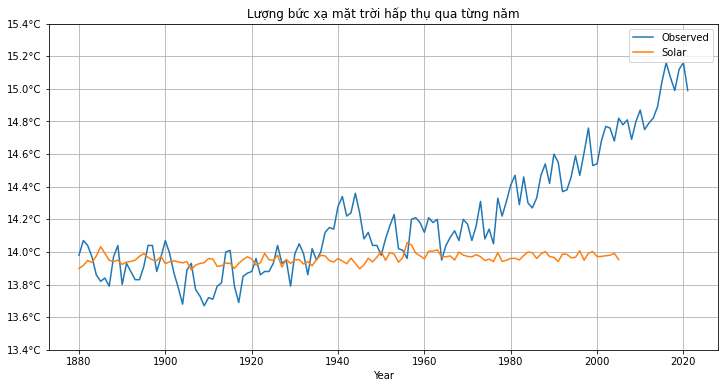

In [6]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(temp_df['No_Smoothing'])
ax.plot(forcings_df['Solar'].loc[1880:])
ax.legend(['Observed', 'Solar'])
ax.grid()
prettify_temp_labels(ax)

plt.xlabel('Year')
plt.title('Lượng bức xạ mặt trời hấp thụ qua từng năm')
plt.show()

Nhận xét:
- Nhiệt lượng hấp thu từ bức xạ mặt trời (cam) bình ổn qua các năm, dao động ở mức 13.9 - 14 độ C. Vì vậy nhiệt lượng hấp thu từ bức xạ mặt trời chỉ đóng góp 1 phần nhỏ vào nhiệt độ trung bình thế giới

## 2. Bức xạ nhiệt của Trái Đất

Bức xạ sóng dài đi ra ngoài (OLR) là bức xạ điện từ có bước sóng từ 3 - 100 $\mu m$ phát ra từ Trái Đất và bầu khí quyển dưới dạng bức xạ nhiệt đi ra ngoài Trái Đất. Giả định rằng thế giới chúng ta trước cách mạng công nghiệp (năm 1850) ở trong trạng thái cân bằng năng lượng, do đó nhiệt độ cân bằng là nhiệt độ tiền công nghiệp (14°C). Với điều kiện vật đen làm mát không gian vũ trụ, ta lập mô hình OLR trong mô hình nhiệt độ bề mặt toàn cầu thông qua một số hạng tuyến tính có dạng $A - BT$, được rút gọn từ chuỗi Taylor.

Ta có công thức tính lượng bức xạ nhiệt của Trái Đất trên một đơn vị diện tích là:

$$ \text{outgoing thermal radiation} = A - BT $$

trong đó:
- $A$ là trạng thái cân bằng trước cách mạng công nghiệp (năm 1850)
- $B = -1.3 W$ là hằng số bức xạ nhiệt

In [7]:
T0 = 14 # preindustrial temperature before 1850 (°C)
B = -1.3 # climate feedback parameter (W/m^2/°C)

Khi Trái Đất đang trong trạng thái cân bằng thì:

$$ \text{absorbed solar insolation} = \text{outgoing thermal radiation} $$

$$ <=> \frac{S(1 - \alpha)}{4} = A - BT_0 $$

Giải phương trình trên ta sẽ tìm được hệ số A.

Ta gán 2 tham số này bằng 2 biến `A` và `B`. Sau đó định nghĩa hàm `outgoing_thermal_radiation()` là hàm nhận đầu vào là 3 tham số `T`, `A`, `B` và kết quả trả về lượng bức xạ nhiệt đi ra ngoài Trái Đất trên một đơn vị diện tích.

In [8]:
A = S * (1 - alpha) / 4 + B * T0

In [9]:
def outgoing_thermal_radiation(T, A = A, B = B):
    return A - B * T

Sau đó ta trực quan hóa lượng bức xạ nhiệt đi ra ngoài có ảnh hưởng như thế nào tới nhiệt độ trung bình của Trái Đất qua từng năm (bắt đầu từ năm 1880).

Ta sẽ dùng đồ thị đường để thể hiện nhiệt độ trung bình của Trái Đất (màu xanh) và nhiệt độ ảnh hưởng do bức xạ nhiệt đi ra ngoài (màu cam). Trong đó:
- Trục tung thể hiển nhiệt độ, đơn vị là °C.
- Trục hoành thể hiện các năm.

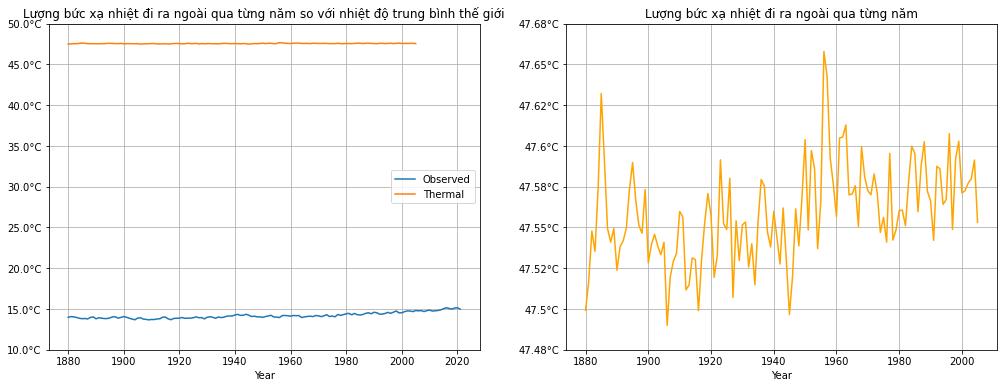

In [10]:
fig, ax = plt.subplots(1,2, figsize = (17, 6))
ax[0].plot(temp_df['No_Smoothing'])
ax[0].plot(forcings_df['Thermal'].loc[1880:])
ax[0].legend(['Observed', 'Thermal'])
ax[0].grid()
ax[0].set(xlabel = 'Year', title = 'Lượng bức xạ nhiệt đi ra ngoài qua từng năm so với nhiệt độ trung bình thế giới')
prettify_temp_labels(ax[0])

ax[1].plot(forcings_df['Thermal'].loc[1880:], color='orange')
ax[1].set(xlabel = 'Year', title = 'Lượng bức xạ nhiệt đi ra ngoài qua từng năm')
prettify_temp_labels(ax[1])
ax[1].grid();

Nhận xét:
- Từ biểu đồ 2, nhiệt lượng tỏa ra thay đổi lên xuống liên tục qua các năm. Nhìn chung, nhiệt lượng tỏa ra tăng không đáng kể, từ 47.5 (1880) lên khoảng 47.55 (khoảng 2005). Nếu so sánh với nhiệt lượng hấp thụ ở trên, nhiệt lượng tỏa ra gấp gần 4 lần nhiệt lượng nhận vào. Nhiệt lượng tỏa ra càng cao, thì bề mặt Trái Đất sẽ càng nóng
- Từ biểu đồ 1, lượng nhiệt tỏa ra cao hơn rất nhiều so với nhiệt độ trung bình thế giới

## 3. Hiệu ứng nhà kính do hàm lượng $CO_2$ gây ra

Lượng $CO_2$ ban đầu trước cách mạng công nghiệp (năm 1850) duy trì ở mức 280 ppm. Sau cách mạng công nghiệp (năm 1850) đã xảy ra một hiện tượng vật lý khác là hiệu ứng nhà kính do hàm lượng $CO_2$ gây ra ở bầu khí quyển. Do đó nhiệt độ trung bình của Trái Đất cũng ảnh hưởng theo.

Ta có công thức tính hàm lượng $CO_2$ gây ra hiệu ứng nhà kính là:

$$ \text{human-caused greenhouse effect} = a * ln \frac{CO_2}{CO_{2, PI}} $$

trong đó:
- $a = 5 W/m^2$ là hệ số ràng buộc $CO_2$
- $CO_2$ là một hàm gia tăng nhiệt độ của lượng $CO_2$ theo thời gian
- $CO_{2, PI} = 280 ppm$ là hàm lượng $CO_2$ trước cách mạng công nghiệp (năm 1850)

Ta gán 2 tham số này bằng 2 biến `a` và `co2_pi`. Sau đó định nghĩa:
- Hàm `human_caused_greenhouse_effect()` là hàm nhận đầu vào là 3 tham số `co2`, `a`, `co2_pi` và kết quả trả về hàm lượng $CO_2$ gây ra hiệu ứng nhà kính.

In [11]:
a = 5 # co2 forcing coefficient (W/m^2)
co2_pi = 280 # preindustrial co2 concentration (ppm)

In [12]:
def human_caused_greenhouse_effect(co2, a = a, co2_pi = co2_pi):
    return a * np.log(co2 / co2_pi)

Sau đó ta trực quan hóa nhiệt độ từ hiệu ứng nhà kính do $CO_2$ gây ra ảnh hưởng như thế nào tới nhiệt độ trung bình của Trái Đất qua từng năm (bắt đầu từ năm 1880).

Ta sẽ dùng đồ thị đường để thể hiện nhiệt độ trung bình của Trái Đất (màu xanh) và nhiệt độ ảnh hưởng do hiệu ứng nhà kính (màu cam). Trong đó:
- Trục tung thể hiển nhiệt độ, đơn vị là °C.
- Trục hoành thể hiện các năm.

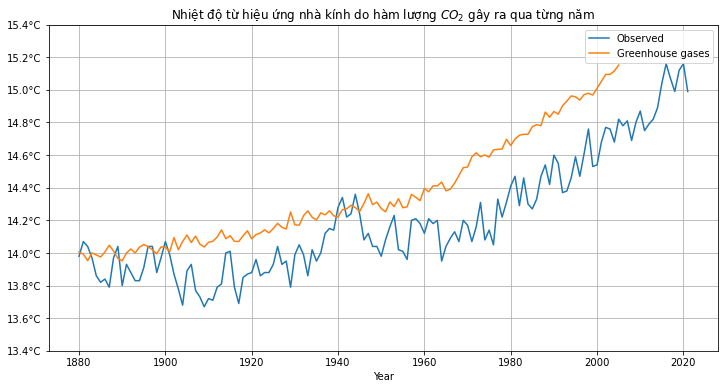

In [13]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(temp_df['No_Smoothing'])
ax.plot(forcings_df['Greenhouse gases'].loc[1880:])
ax.legend(['Observed', 'Greenhouse gases'])
ax.grid()
prettify_temp_labels(ax)
plt.xlabel('Year')
plt.title('Nhiệt độ từ hiệu ứng nhà kính do hàm lượng $CO_2$ gây ra qua từng năm')
plt.show()

Nhận xét:
- Dễ thấy nhiệt độ ảnh hưởng bởi hiệu ứng nhà kính gây ra bởi hàm lượng $CO_2$ (cam) không quá khác biệt so với nhiệt độ trung bình thế giới.

# II. PHƯƠNG TRÌNH VI PHÂN CỦA MÔ HÌNH KHÍ HẬU

Nhiệt dung riêng của Trái Đất duy trì ở mức 51 $J/m^2/°C$ qua từng năm. Do đó sự thay đổi nhiệt dung theo thời gian là cố định. Ta có công thức về sự thay đổi của nhiệt dung theo thời gian như sau:

$$ \text{change in heat content} = C \frac{dT}{dt} $$

trong đó: $C = 51 J/m^2/°C$ là nhiệt dung riêng của bầu khí quyển và trên mặt nước

In [14]:
C = 51 # atmosphere and upper-ocean heat capacity (J/m^2/°C)

Kết hợp tất cả các yếu tố có ảnh hưởng tới nhiệt độ trung bình của Trái Đất, ta được một phương trình vi phân thể hiển mô hình thời tiết cân bằng năng lượng trong không gian "0 chiều":

> change in heat content = $+$ absorbed solar insolation $-$ outgoing thermal radiation $+$ human-caused greenhouse effect

$$ C \frac{dT}{dt} = \frac{S(1 - \alpha)}{4} - (A - BT_0) + a * ln \frac{CO_2}{CO_{2, PI}} $$

$$ C \frac{T(t + \Delta t) - T(t)}{\Delta t} = \frac{S(1 - \alpha)}{4} - (A - BT_0) + a * ln \frac{CO_2}{CO_{2, PI}} $$

$$ T(t + \Delta t) = T(t) + \frac{\Delta t}{C} \bigg[\frac{S(1 - \alpha)}{4} - (A - BT_0) + a * ln \frac{CO_2}{CO_{2, PI}} \bigg] $$

In [15]:
t0 = 1850 # industrial revolution start

Ta sẽ định nghĩa lớp `EBM` (**E**nergy **B**alance **M**odel) để xây dựng mô hình dự đoán thời tiết dựa vào phương trình vi phân trên với 2 phương thức sau:
- **init()**: lưu trữ các tham số của mô hình bao gồm:
    - Các tham số mặc định (người dùng có thể thay đổi các tham số này từ mô hình): 
        - **S**: nhiệt lượng trung bình hấp thụ từ tia mặt trời, mặc định là 1368 $W/m^2$
        - **alpha**: hệ số albedo, mặc định là 0.3
        - **T0**: nhiệt độ trước cách mạng công nghiệp năm 1850, mặc định là 14°C
        - **B**: hằng số bức xạ nhiệt, mặc định là -1.3W
        - **A**: trạng thái cân bằng trước cách mạng công nghiệp năm 1850
        - **a**: hệ số ràng buộc $CO_2$, mặc định là 5
        - **co2_pi**: hàm lượng $CO_2$ trước cách mạng công nghiệp (năm 1850), mặc định là 280 ppm
        - **C**: nhiệt dung riêng của bầu khí quyển và trên mặt nước, mặc định là 51 $J/m^2/°C$
    - Các tham số do người dùng nhập vào:
        - **t0**: thời gian bắt đầu của mô hình, đơn vị là năm
        - **delta_t**: chênh lệch giữa 2 mốc thời gian trong mô hình, đơn vị là năm
        - **co2**: hàm gia tăng nhiệt độ của lượng $CO_2$ theo thời gian, đầu vào phải là một function
- **predict()**: dự đoán nhiệt độ dựa vào mô hình, nhận đầu vào là năm kết thúc **end_year**, đầu ra là một mảng danh sách các năm từ năm bắt đầu **t0** tới năm kết thúc **end_year** được lưu vào biến **t** và một mảng danh sách các nhiệt độ trung bình của Trái Đất qua từng năm được lưu vào biến **T**.

In [16]:
class EBM():
    def __init__(self, t0 = None, delta_t = None, co2 = None, S = 1368, alpha = 0.3, T0 = 14, B = -1.3, a = 5, co2_pi = 280, C = 51):
        self.S = S
        self.alpha = alpha
        self.T0 = T0
        self.B = B
        self.A = self.S * (1 - self.alpha) / 4 + self.B * self.T0
        self.a = a
        self.co2_pi = co2_pi
        self.C = C

        self.T = np.empty([0])
        self.t = np.empty([0])
        
        if t0 == None:
            raise Exception("A parameter t0 cannot be empty")
        self.t0 = t0
        
        if delta_t == None:
            raise Exception("A parameter delta_t cannot be empty")
        self.delta_t = delta_t
        
        if co2 == None:
            raise Exception("A parameter co2 cannot be empty")
        if isinstance(co2, types.FunctionType) == False:
            raise Exception("A parameter co2 should be a function")
        self.co2 = co2
        
    def predict(self, predicted_year = None):
        if predicted_year == None:
            raise Exception("A variable predicted_year cannot be empty")
        if predicted_year < t0:
            raise Exception("Predited year should be bigger than original year")
            
        self.T = np.array([self.T0])
        self.t = np.array([self.t0])
        
        for i in range(predicted_year - t0):
            change_in_heat_content = absorbed_solar_insolation(alpha = self.alpha, S = self.S) \
                                    - outgoing_thermal_radiation(self.T[i], A = self.A, B = self.B) \
                                    + human_caused_greenhouse_effect(self.co2(self.t[i]), a = self.a, co2_pi = self.co2_pi)
            self.T = np.append(self.T, self.T[i] + self.delta_t * change_in_heat_content / self.C)
            self.t = np.append(self.t, self.t[i] + self.delta_t)

# III. ÁP DỤNG VÀO THỰC TẾ ĐỂ DỰ ĐOÁN THỜI TIẾT

Thực hiện chạy mô hình EBM với đầu năm bắt đầu là 1850 (`t0 = 1850`), khoảng chênh lệch giữa 2 năm là 1 (`delta_t = 1`) và hàm gia tăng nhiệt độ của lượng $CO_2$ dưới đây. Sau đó dự đoán nhiệt độ tới năm 2050, lưu kết quả trả về vào dataframe `predict_df` gồm 2 cột `Year` để lưu mảng danh sách các năm và `Predict` để lưu mảng danh sách nhiệt độ. Đặt cột `Year` làm cột chỉ mục.
- Hàm `co2()` là hàm nhận đầu vào là thời gian `t` và kết quả trả về là sự gia tăng nhiệt độ của lượng $CO_2$.

In [17]:
def co2(t):
    return co2_pi * (1 + ((t - t0) / 220)**3)

In [18]:
ebm = EBM(t0, 1, co2)
ebm.predict(2050)
predict_df = pd.DataFrame({'Year': ebm.t, 'Predict': ebm.T}).set_index('Year')
predict_df

,Predict
Year,
1850,14.000000
1851,14.000000
1852,14.000000
1853,14.000000
1854,14.000000
...,...
2046,15.301379
2047,15.320640
2048,15.340032


Ta sẽ dùng đồ thị đường để thể hiện nhiệt độ trung bình của Trái Đất (màu xanh dương) và nhiệt độ sau khi được làm mịn (màu cam) và nhiệt độ của Trái Đất áp dụng mô hình EBM (màu xanh lá). Trong đó:
- Trục tung thể hiển nhiệt độ, đơn vị là °C.
- Trục hoành thể hiện các năm.

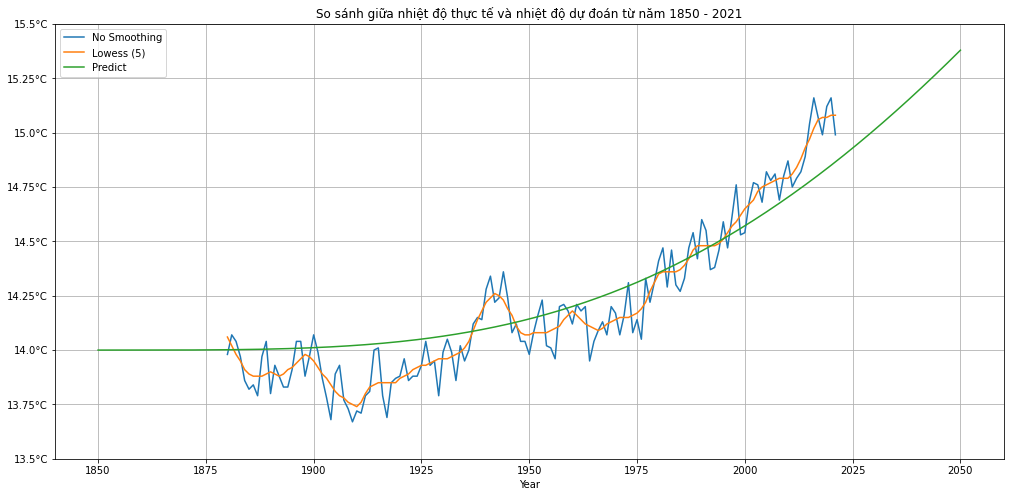

In [19]:
fig, ax = plt.subplots(figsize = (17, 8))
ax.plot(temp_df)
ax.plot(predict_df)
ax.legend(['No Smoothing', 'Lowess (5)', 'Predict'])
ax.grid()
prettify_temp_labels(ax)
plt.xlabel('Year')
plt.title('So sánh giữa nhiệt độ thực tế và nhiệt độ dự đoán từ năm 1850 - 2021')
plt.show()

In [20]:
print('Dự đoán nhiệt độ vào năm 2030 là: {}°C'.format(predict_df['Predict'][2030]))
print('Dự đoán nhiệt độ vào năm 2050 là: {}°C'.format(predict_df['Predict'][2050]))

Dự đoán nhiệt độ vào năm 2030 là: 15.011899118847381°C
Dự đoán nhiệt độ vào năm 2050 là: 15.379207824814596°C


Nhận xét:
- Năm 2021 là 1 trong 7 năm liên tiếp (2015-2021) trái đất ấm lên nhiều nhất kể từ năm 1850, đạt khoảng 15°C. Theo mô hình, thì tình trạng này sẽ duy trì và kéo dài tới năm 2030 (tăng ~1.01°C so với năm 1850); tuy nhiên trong tương lai xa (2050), dự kiến nhiệt độ sẽ tăng lên rất nhiều, khoảng 0.3°C - thiết lập kỷ lục mới về nhiệt độ nóng lên toàn cầu cao nhất từng được ghi nhận